# Getting Collocates for Words

This shows how you can get collocates for a pattern.

### Reading in the text

In [1]:
%ls *.txt

Hume Enquiry.txt   Hume Treatise.txt  untitled.txt


In [4]:
with open("Hume Treatise.txt", "r") as f:
    theText = f.read()

print("This string has", "{:,}".format(len(theText)), "characters")

This string has 1,344,061 characters


### Tokenizing

In [34]:
import re
theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
print(theTokens[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'a', 'treatise', 'of', 'human', 'nature']


### Finding the collocates

In [37]:
wrd2find = input("What word do you want collocates for?") # Ask for the word to search for
context = 5 # This sets the context of words on either side to grab

end = len(theTokens)
counter = 0
theCollocates = []
for word in theTokens:
    if word == wrd2find: # This checks to see if the word is what we want
        for i in range(context):
            if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                theCollocates.append(theTokens[(counter - (i + 1))]) # This adds words before
            if (counter + (i + 1)) < end: # This checks that we aren't at the end
                theCollocates.append(theTokens[(counter + (i + 1))]) # This adds words afte
    counter = counter + 1
    
print(theCollocates[:10])

What word do you want collocates for?gutenberg
['project', 'ebook', 'the', 'of', 'a', 'treatise', 'of', 'project', 'license', 'the']


### Doing things with the collocates

In [38]:
print(len(theCollocates))

357


In [40]:
print(set(theCollocates))

123


In [56]:
import nltk
tokenDist = nltk.FreqDist(theCollocates)
tokenDist.tabulate(10)

   project        the foundation   literary    archive         of         to          1          a       with 
        33         31         15         14         14         12         10          9          8          8 


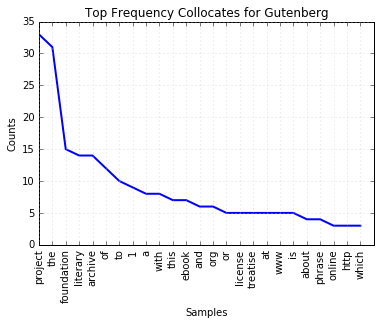

In [46]:
import matplotlib
%matplotlib inline
tokenDist.plot(25, title="Top Frequency Collocates for " + wrd2find.capitalize())

In [63]:
import csv
nameOfResults = wrd2find.capitalize() + ".Collocates.csv"
table = tokenDist.most_common()

with open(nameOfResults, "w") as f:
    writer = csv.writer(f)
    writer.writerows(table)
    
print("Done")

Done
